## Telecom Customer Churn:

In [ ]:
# Importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/hack/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Features types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

####  Seperate into numerical and categorical data for EDA parts

In [ ]:
# Total charges are in object dtype so convert into Numerical feature
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#### Separate into Numerical and Categorical feature

In [ ]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'SeniorCitizen', 'tenure', 'TotalCharges', 'MonthlyCharges'}


In [ ]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 17
Categorical feature are:
 {'PaperlessBilling', 'customerID', 'InternetService', 'StreamingMovies', 'OnlineBackup', 'MultipleLines', 'gender', 'OnlineSecurity', 'TechSupport', 'PhoneService', 'StreamingTV', 'DeviceProtection', 'PaymentMethod', 'Contract', 'Partner', 'Churn', 'Dependents'}


In [ ]:
# Check for null values
null_values = data.isnull().sum()

# Display columns with null values
print("Columns with Null Values:")
print(null_values[null_values > 0])


Columns with Null Values:
TotalCharges    11
dtype: int64


## EDA

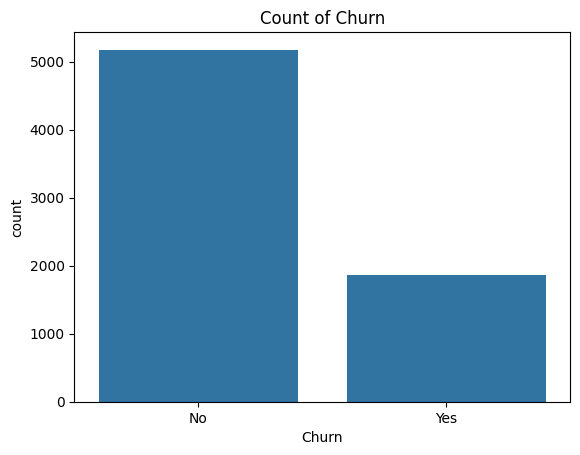

In [ ]:
# plotting with target feature
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

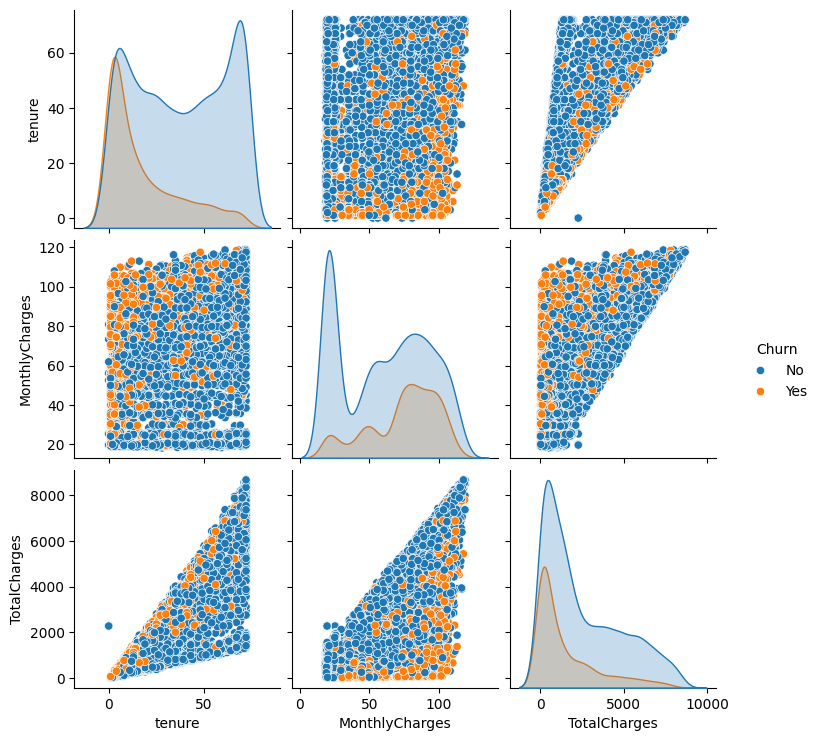

In [ ]:
sns.pairplot(data.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

Text(0.5, 1.0, '% of Senior Citizens')

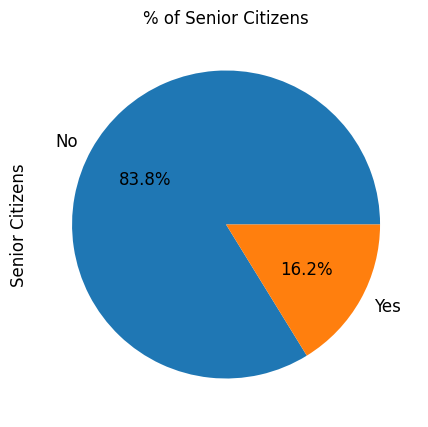

In [ ]:
# pie chart for Count of Senior citizens
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

##### **Only 16.2% customers who are senior citizons but remaining 83.8% customers are young people**

#### **Univariate Analysis:**

<Figure size 640x480 with 0 Axes>

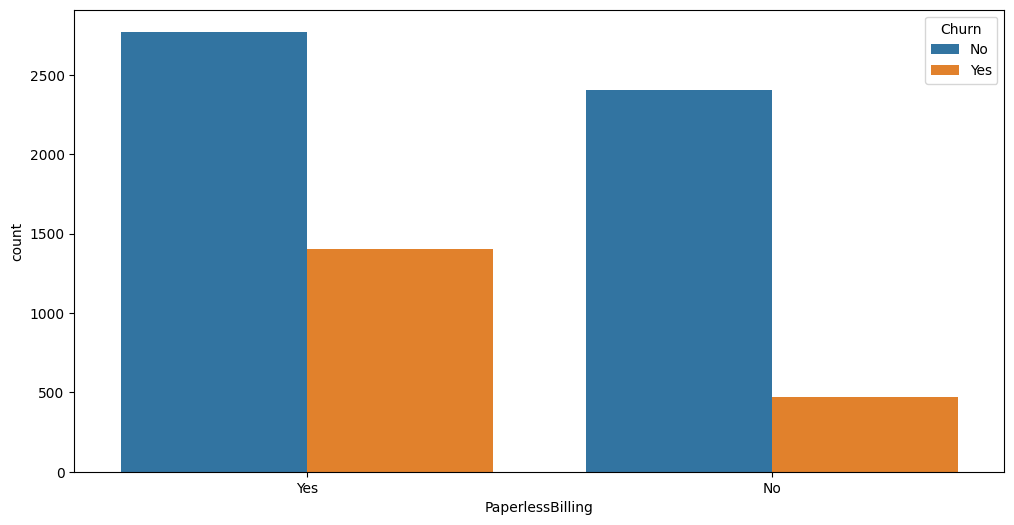

<Figure size 640x480 with 0 Axes>

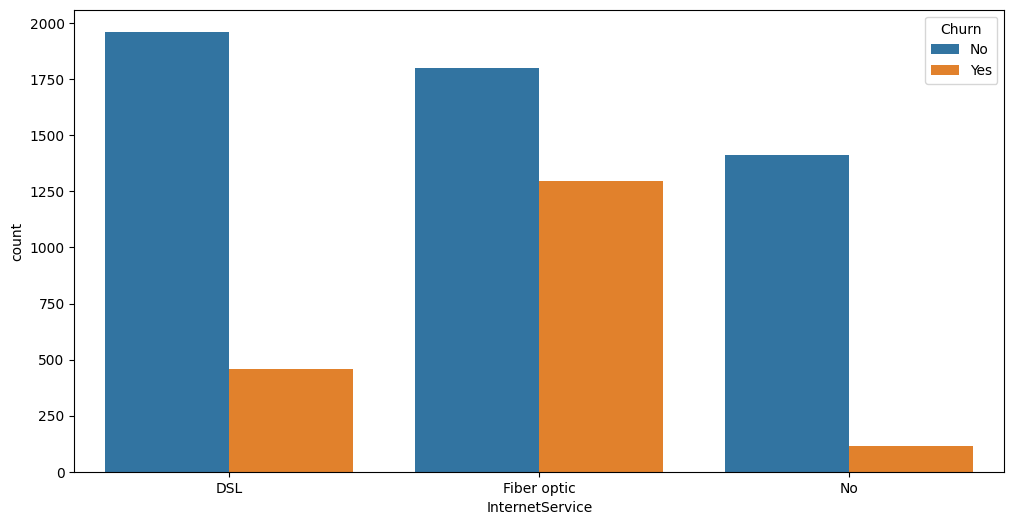

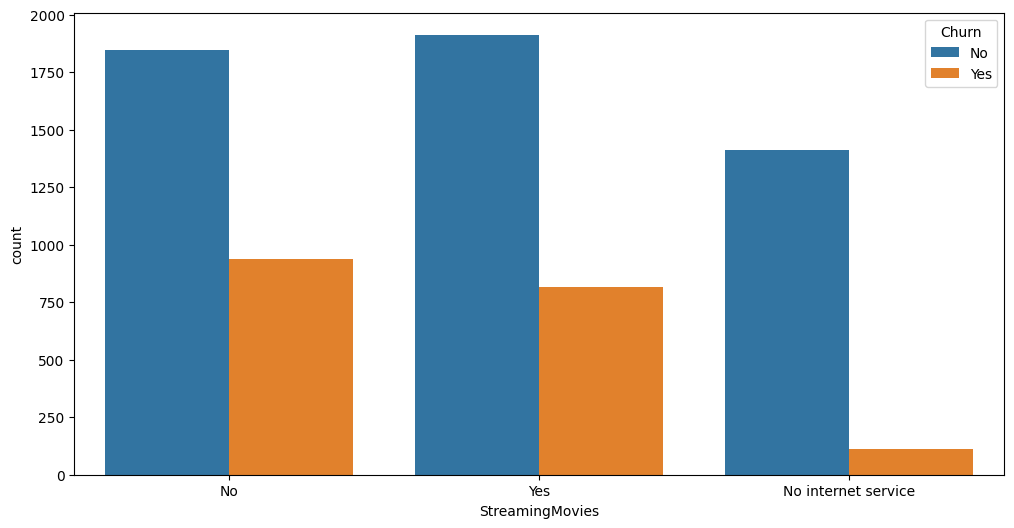

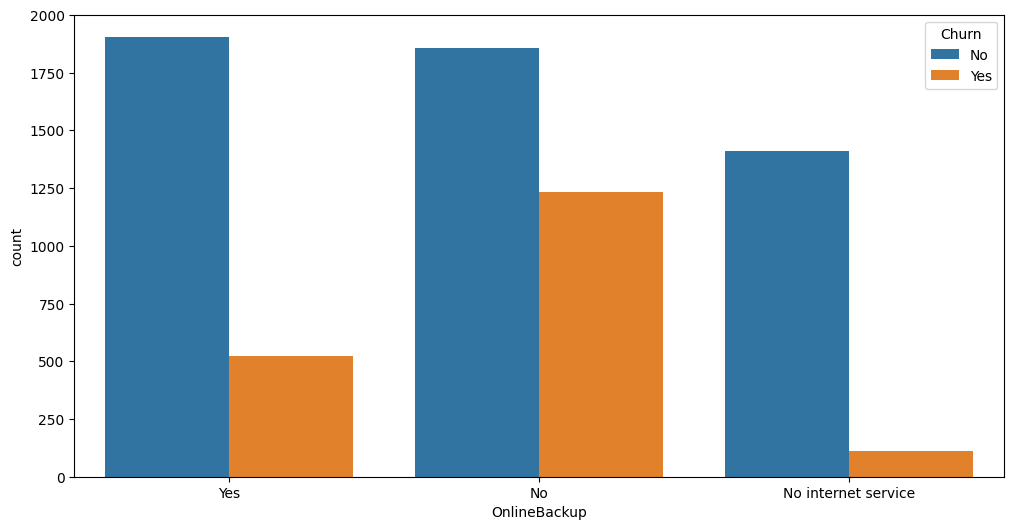

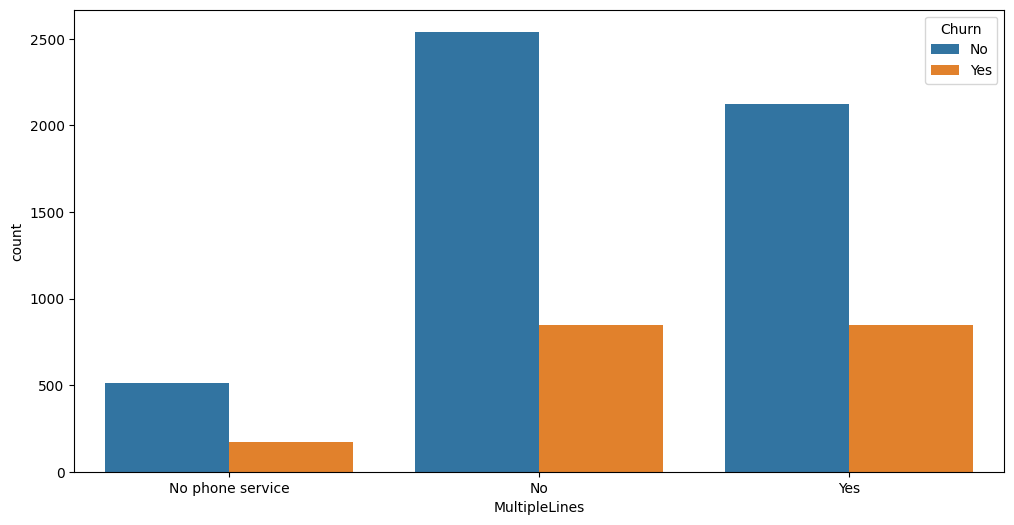

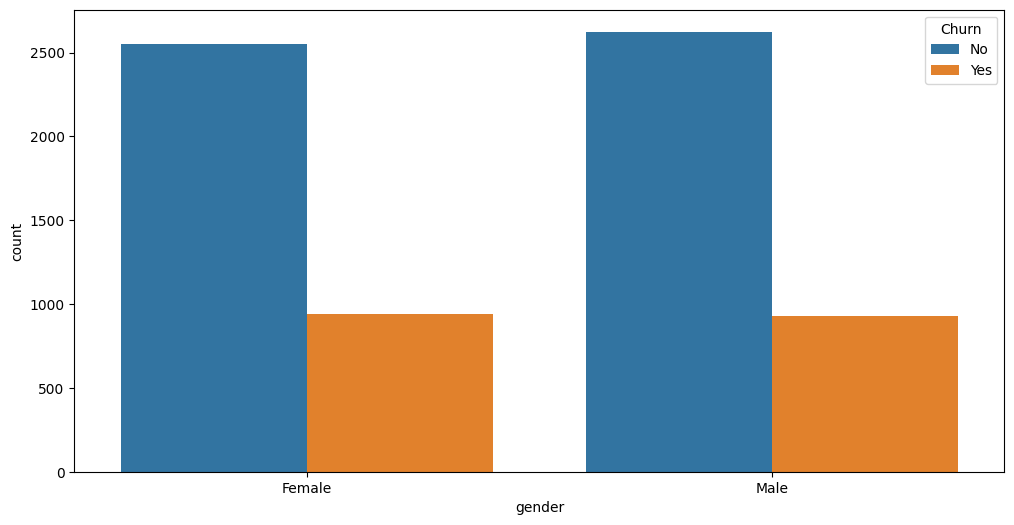

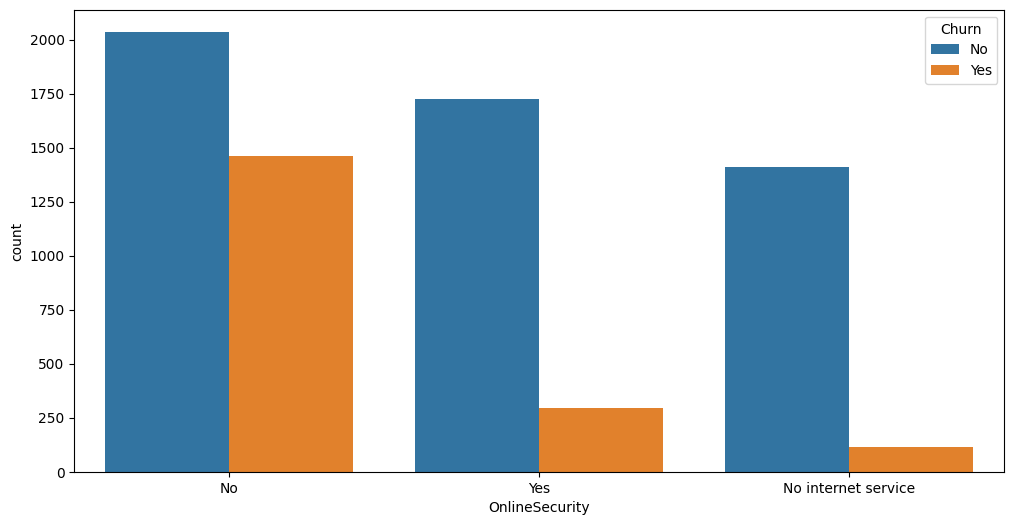

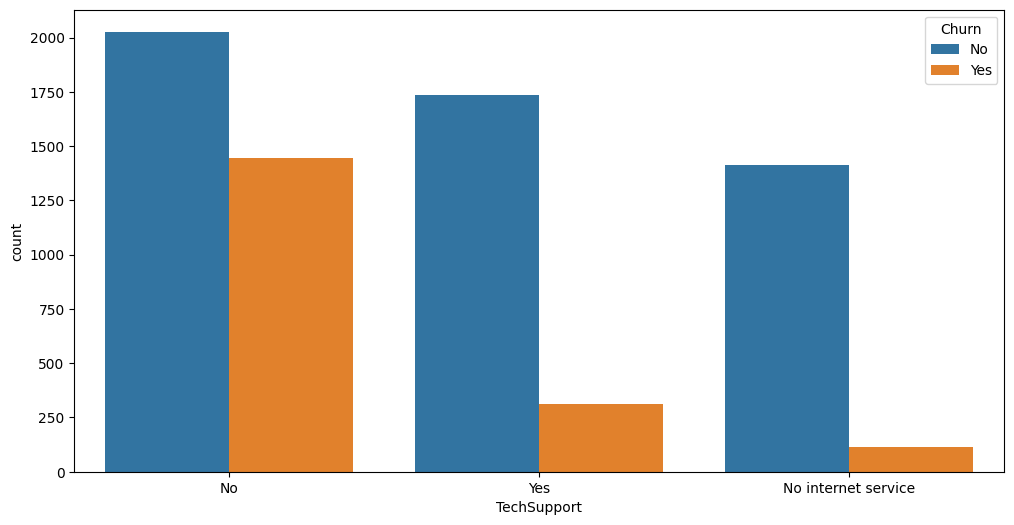

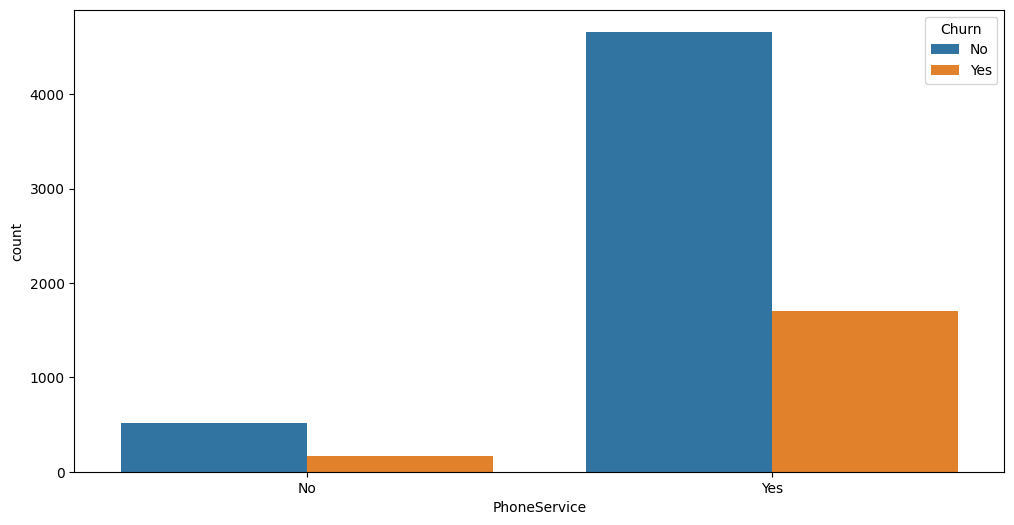

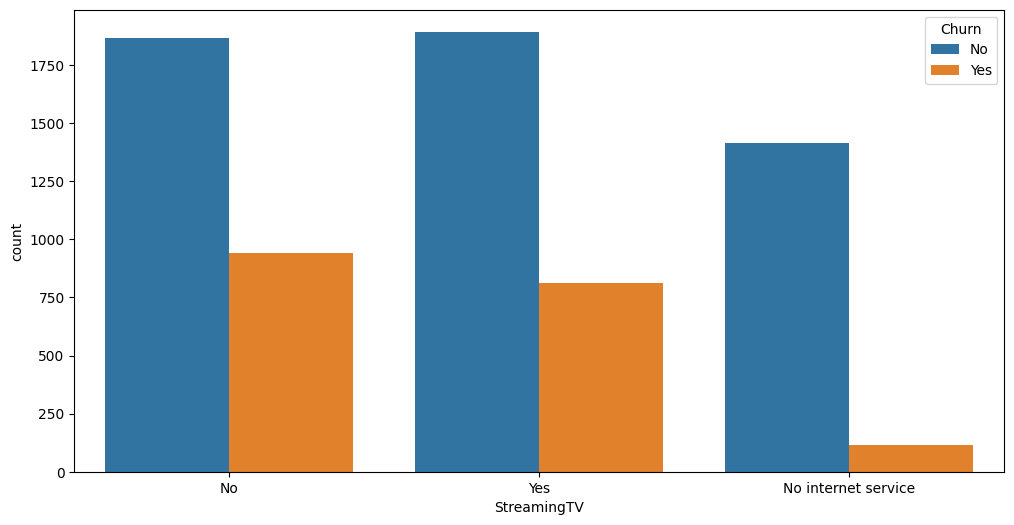

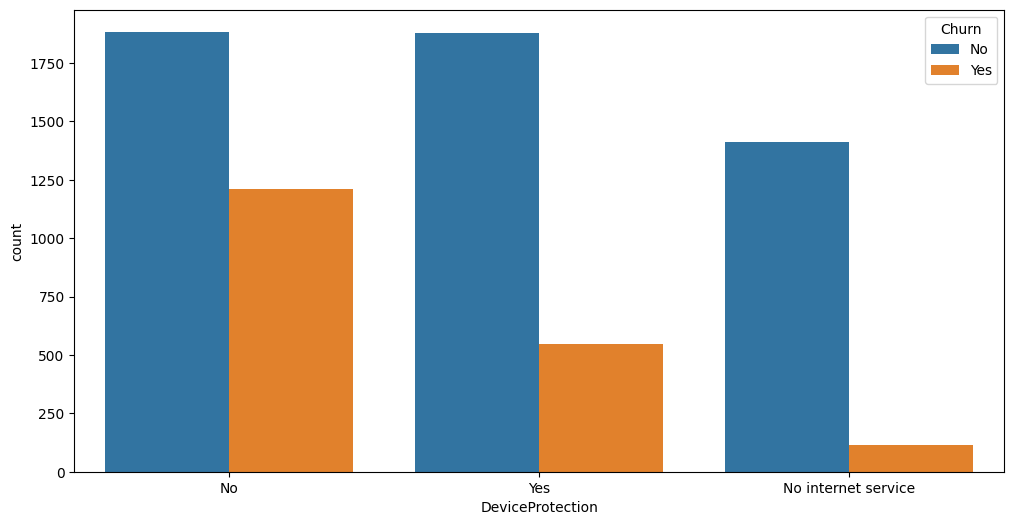

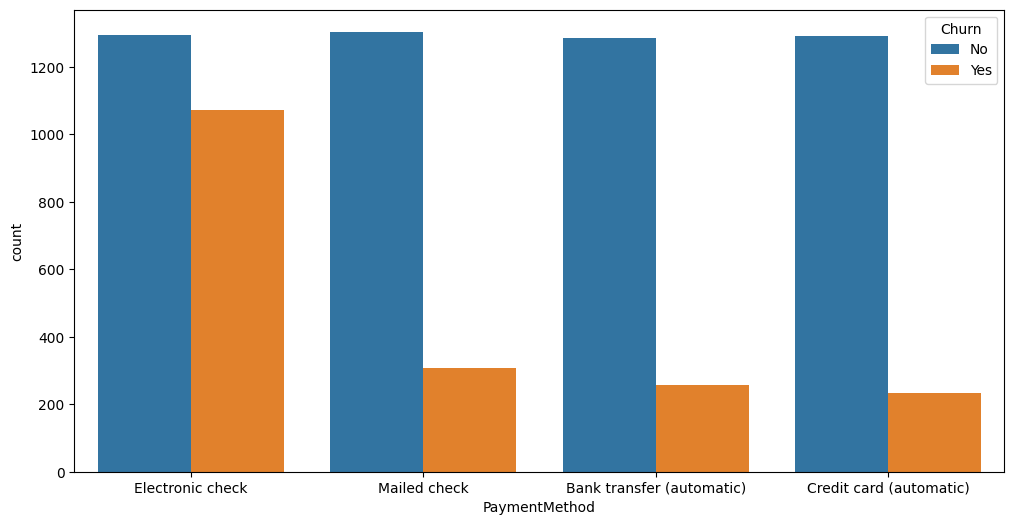

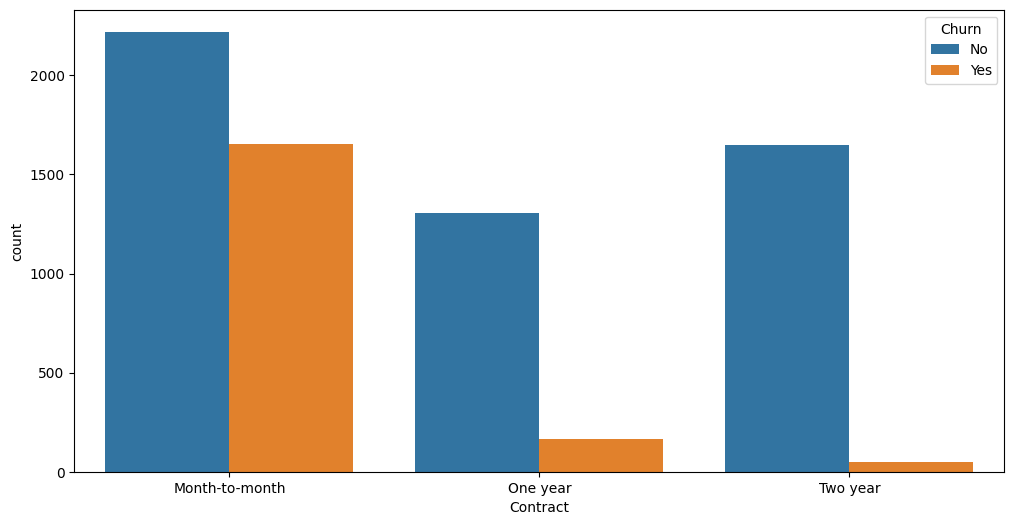

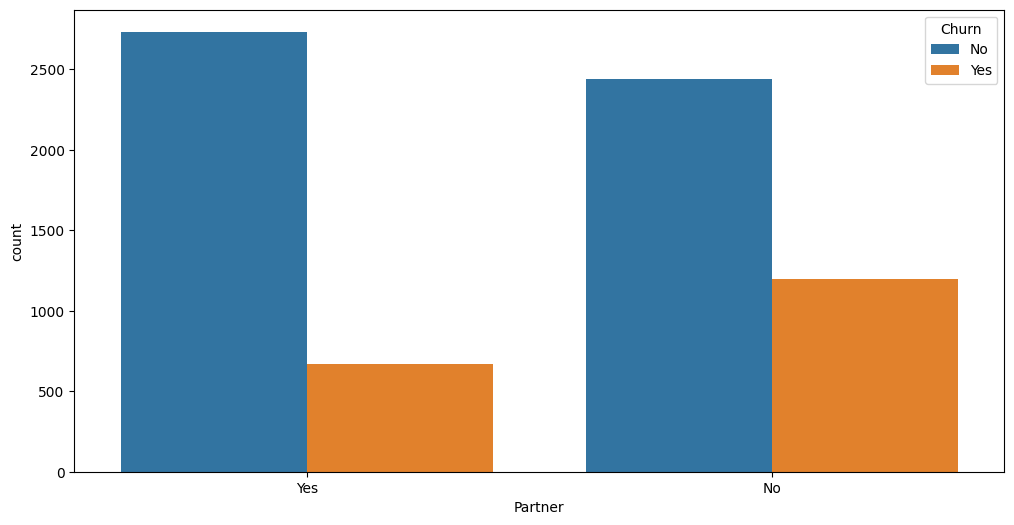

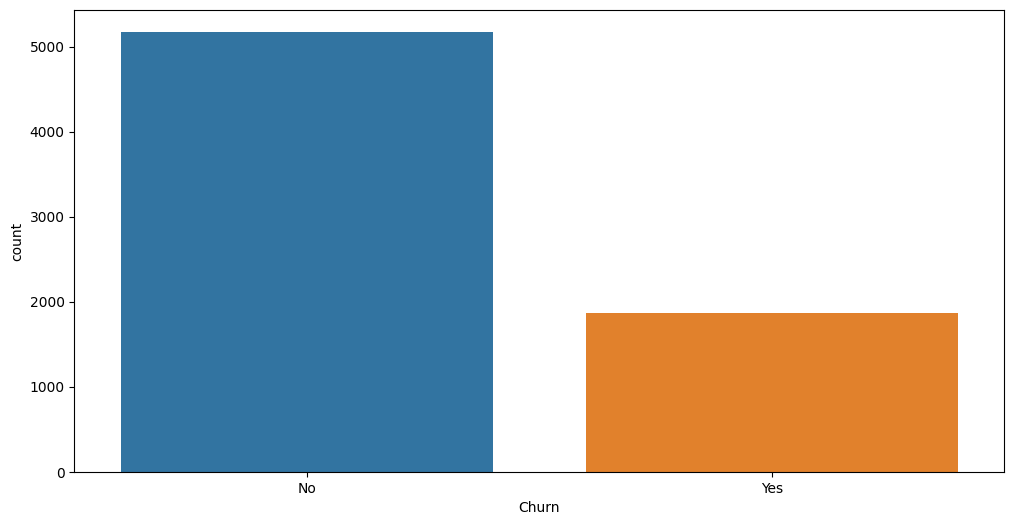

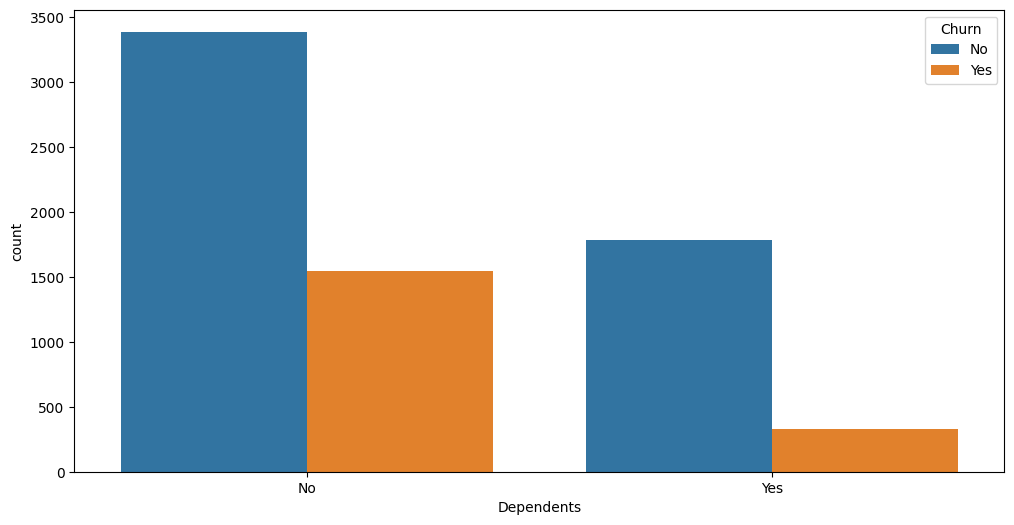

In [ ]:
for i, feature in enumerate(categorical_feature):
    if feature != 'TotalCharges':
        if feature != 'customerID':
            plt.figure(i)
            plt.figure(figsize=(12,6))
            sns.countplot(data=data, x=feature, hue='Churn')
plt.show()

#### **Data Cleaning:**

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# replace NaN values with mean value
data.TotalCharges = data.TotalCharges.fillna(data.TotalCharges.median())

<Axes: >

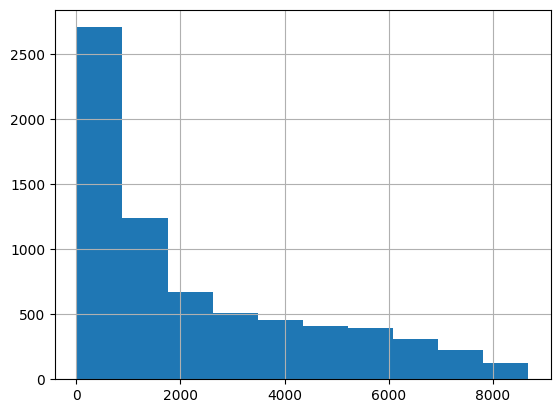

In [ ]:
data.TotalCharges.hist()

In [ ]:
print(categorical_feature)

{'PaperlessBilling', 'customerID', 'InternetService', 'StreamingMovies', 'OnlineBackup', 'MultipleLines', 'gender', 'OnlineSecurity', 'TechSupport', 'PhoneService', 'StreamingTV', 'DeviceProtection', 'PaymentMethod', 'Contract', 'Partner', 'Churn', 'Dependents'}


In [ ]:
data.to_csv("Data.csv", index=False)

In [ ]:
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data.drop(columns=['customerID'], inplace=True)

<Axes: >

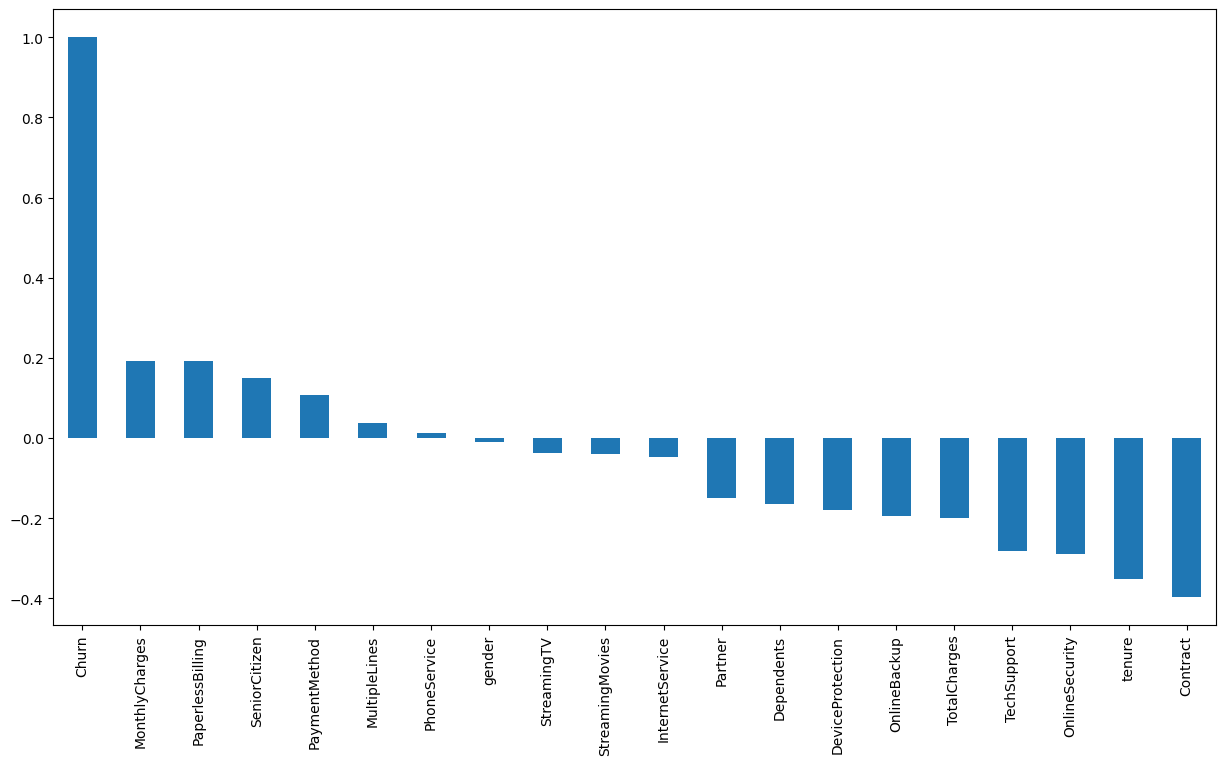

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

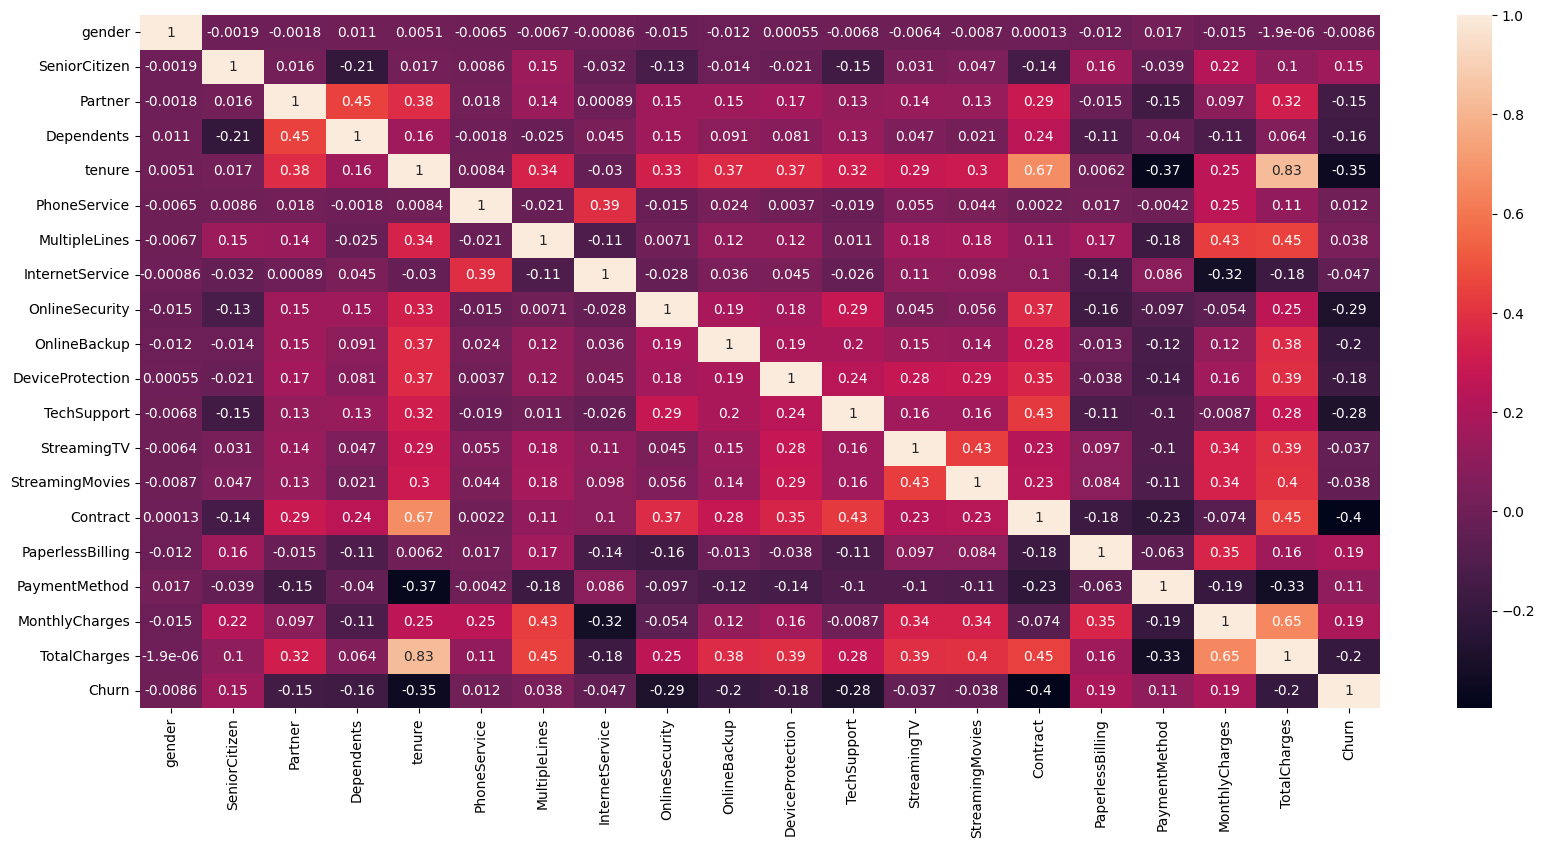

In [ ]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

#### Splitting the dataset into train and test

In [ ]:
# splitting dataset into dependent and independent feature
X = data.drop(columns='Churn')
y = data['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


#### Feature Selection: Selects only 10 feature which has higher correlation

In [ ]:
# selects the feature which has more correlation
selection = SelectKBest()  # k=10 default
X = selection.fit_transform(X,y)

**According to the feature selection, we selects the 10 out of 21 features. these are the 10 features are selected [Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]**

##### **From sklearn using feature selection modules importing the SelectKBest to select the important feature**

In [ ]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(5634, 10)

In [ ]:
X_test.shape

(1409, 10)

In [ ]:
# its an imbalance dataset
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### **Apply into machine learning algorithm:**

In [ ]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.7963094393186657
Confusion matrix :
 [[906 174]
 [113 216]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1080
           1       0.55      0.66      0.60       329

    accuracy                           0.80      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.81      0.80      0.80      1409



In [ ]:
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(Log_reg, f)

In [ ]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.7849538679914834
Confusion matrix :
 [[913 197]
 [106 193]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1110
           1       0.49      0.65      0.56       299

    accuracy                           0.78      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.81      0.78      0.79      1409



In [ ]:
import pickle
# Store the model in a pickle file
with open('random_forest_classifier.pkl', 'wb') as f:
    pickle.dump(Rfc, f)

In [ ]:

# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7785663591199432
Confusion matrix :
 [[906 199]
 [113 191]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1105
           1       0.49      0.63      0.55       304

    accuracy                           0.78      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.80      0.78      0.79      1409



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Gradient Boosting Classifier with desired parameters
Gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3)

# Train the model
Gbc.fit(X_train, y_train)

# Predict on the test set
gbc_pred = Gbc.predict(X_test)

# Print accuracy score
print(f'Accuracy score: {accuracy_score(gbc_pred, y_test)}')

# Print confusion matrix
print(f'Confusion matrix:\n{confusion_matrix(gbc_pred, y_test)}')

# Print classification report
print(f'Classification report:\n{classification_report(gbc_pred, y_test)}')


Accuracy score: 0.7530163236337828
Confusion matrix:
[[881 210]
 [138 180]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1091
           1       0.46      0.57      0.51       318

    accuracy                           0.75      1409
   macro avg       0.66      0.69      0.67      1409
weighted avg       0.77      0.75      0.76      1409



### **Using SMOTEENN for imbalance dataset:**

In [ ]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 4155, 1: 1479})
The number of classes after fit Counter({1: 2510, 0: 2176})


In [ ]:
# splitting the over sampling dataset
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [ ]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.946969696969697
Confusion matrix :
 [[402  23]
 [ 26 473]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       425
           1       0.95      0.95      0.95       499

    accuracy                           0.95       924
   macro avg       0.95      0.95      0.95       924
weighted avg       0.95      0.95      0.95       924



In [ ]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9534632034632035
Confusion matrix :
 [[404  19]
 [ 24 477]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       423
           1       0.96      0.95      0.96       501

    accuracy                           0.95       924
   macro avg       0.95      0.95      0.95       924
weighted avg       0.95      0.95      0.95       924



In [ ]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.8912579957356077
Confusion matrix :
 [[372  49]
 [ 53 464]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       421
           1       0.90      0.90      0.90       517

    accuracy                           0.89       938
   macro avg       0.89      0.89      0.89       938
weighted avg       0.89      0.89      0.89       938



In [ ]:
with open('LR_SMOTEENN.pkl', 'wb') as f:
    pickle.dump(Log_reg_sampling, f)

In [ ]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9632034632034632
Confusion matrix :
 [[409  15]
 [ 19 481]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       424
           1       0.97      0.96      0.97       500

    accuracy                           0.96       924
   macro avg       0.96      0.96      0.96       924
weighted avg       0.96      0.96      0.96       924



In [ ]:
import pickle

# Save the trained Gradient Boosting Classifier and SMOTEENN transformer to a pickle file
with open("GB_model_SMOTEENN.sav", "wb") as file:
    pickle.dump((st, gbc), file)


**After using SMOOTEENN methods to perform over sampling and down sampling with edited nearest neighbours. From this results we get bet accuraccy and TP FP ratio also increases in GradientBoostClassifier so perform HyperParameter Tunning for this model only**

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': np.linspace(0.1, 1.0, 10),  # Regularization parameter
    'max_iter': [100, 150, 200]       # Maximum number of iterations
}

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression()

# Initialize RandomizedSearchCV for hyperparameter tuning
logistic_regression_optm = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_grid, n_iter=100, verbose=3)

# Fit RandomizedSearchCV to the training data
logistic_regression_optm.fit(X_train_sap, y_train_sap)

# Get the best estimator found by RandomizedSearchCV
best_logistic_regression = logistic_regression_optm.best_estimator_

# Print the best estimator
print("Best Logistic Regression Model:", best_logistic_regression)

# Train the best Logistic Regression model
best_logistic_regression.fit(X_train_sap, y_train_sap)

# Predict on the test set
logistic_regression_pred = best_logistic_regression.predict(X_test_sap)

# Print accuracy score
print(f'Accuracy score : {accuracy_score(logistic_regression_pred, y_test_sap)}')

# Print confusion matrix
print(f'Confusion matrix :\n {confusion_matrix(logistic_regression_pred, y_test_sap)}')

# Print classification report
print(f'Classification report :\n {classification_report(logistic_regression_pred, y_test_sap)}')


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...............C=0.1, max_iter=100;, score=0.924 total time=   0.2s
[CV 2/5] END ...............C=0.1, max_iter=100;, score=0.907 total time=   0.2s
[CV 3/5] END ...............C=0.1, max_iter=100;, score=0.903 total time=   0.2s
[CV 4/5] END ...............C=0.1, max_iter=100;, score=0.895 total time=   0.3s
[CV 5/5] END ...............C=0.1, max_iter=100;, score=0.920 total time=   0.2s
[CV 1/5] END ...............C=0.1, max_iter=150;, score=0.924 total time=   0.2s
[CV 2/5] END ...............C=0.1, max_iter=150;, score=0.907 total time=   0.2s
[CV 3/5] END ...............C=0.1, max_iter=150;, score=0.909 total time=   0.3s
[CV 4/5] END ...............C=0.1, max_iter=150;, score=0.892 total time=   0.2s
[CV 5/5] END ...............C=0.1, max_iter=150;, score=0.920 total time=   0.1s
[CV 1/5] END ...............C=0.1, max_iter=200;, score=0.924 total time=   0.2s
[CV 2/5] END ...............C=0.1, max_iter=200

In [ ]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [ ]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

In [ ]:
gbc_optm.best_estimator_

GradientBoostingClassifier(learning_rate=0.4, loss='deviance', max_depth=19,
                           max_leaf_nodes=12, min_samples_leaf=9,
                           min_samples_split=3, n_estimators=200)

In [ ]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9653679653679653
Confusion matrix :
 [[409  13]
 [ 19 483]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       422
           1       0.97      0.96      0.97       502

    accuracy                           0.97       924
   macro avg       0.96      0.97      0.97       924
weighted avg       0.97      0.97      0.97       924



**After Oversampling the dataset our model performs is pretty good. From our 4 model GradientBoostClassifier performs better than all. So we dumb our model using pickle library**

#### **Model Saving:**

In [ ]:
import pickle

In [ ]:
filename = 'GB_model_HT.sav'
pickle.dump(gbc_tunning, open(filename,'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
load_model.score(X_test_sap, y_test_sap)

0.9653679653679653

In [ ]:
Dependents = 'Yes'
tenure = 49
OnlineSecurity = 'Yes'
OnlineBackup = 'Yes'
DeviceProtection = 'No'
TechSupport = 'Yes'
Contract = 'Month-to-month'
PaperlessBilling = 'No'
MonthlyCharges = 59.6
TotalCharges = 2970.3

In [ ]:
data = [[Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]]

In [ ]:
df = pd.DataFrame(data, columns=['Dependents', 'tenure', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'])
df.head()
print(df.dtypes)

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [ ]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling


In [ ]:
encoder = LabelEncoder()
for feature in df.columns:
    if df[feature].dtypes == 'O':
        df[feature] = encoder.fit_transform(df[feature])

In [ ]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,49,0,0,0,0,0,0,59.6,2970.3


In [ ]:
single = load_model.predict(df)
probability = load_model.predict_proba(df)[:,1]

In [ ]:
print(single)

[0]


In [ ]:
print(probability)

In [ ]:
if single == 1:
    print("This Customer is likely to be Churned!")
    print(f"Confidence level is {np.round(probability*100, 2)}")
else:
    print("This Customer is likely to be Continue!")
    print(f"Confidence level is {np.round(probability*100, 2)}")

This Customer is likely to be Continue!
Confidence level is [0.08]
